__My first day as i'm improving on Exploratory Data analisies__.<br> 
Today i will explore and analisize a dataset i find on kaggle https://www.kaggle.com/fedesoriano/heart-failure-prediction

- __Attribute Information:__
    - Age: age of the patient [years]
    - Sex: sex of the patient [M: Male, F: Female]
    - ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY:    Asymptomatic]
    - RestingBP: resting blood pressure [mm/Hg]
    - Cholesterol: serum cholesterol [mmol/dl]
    - FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    - RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    - MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    - ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    - Oldpeak: oldpeak = ST [Numeric value measured in depression]
    - ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    - HeartDisease: output class [1: heart disease, 0: Normal]


Let's start importing the main libraries, pandas to load the dataset,sklearn to split my dataset and operate on data(Standardize, normalize etc),numpy to work with matrix and vector, matplotlib and seaborn to visualize my data.

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
from scipy.stats import norm, normaltest,shapiro
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline

#disable the warning on copy assignment
pd.options.mode.chained_assignment = None
plt.rcParams["figure.figsize"] = (15,7)

The first thing let's read the database in a pandas dataframe

In [22]:
df_path = "Datasets/HearthDisease/heart.csv"
dataset = pd.read_csv(df_path)

Let's explore the values in the dataset.
As we can see there aren't missing value so we don't have to deal with that.
But as we will see later will be value that make no sense and we will treat them as missing value

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


We have 918 entries in the database,without missing or NA value.
Let's print the categorical feature and the numeric feature.
To visualize better which is which.

In [24]:
categorical_features = list(dataset.select_dtypes(np.object).columns)
numeric_features = list(dataset.select_dtypes(np.number).columns)
boolean_feature = ["FastingBS","HeartDisease"]
for ftr in boolean_feature:
    numeric_features.remove(ftr)
    

print("There are {1} numeric features: {0}".format(numeric_features,len(numeric_features)))
print("There are {1} categorical features: {0}".format(categorical_features,len(categorical_features)))
print("There are {1} numeric features: {0}".format(boolean_feature,len(boolean_feature)))



There are 5 numeric features: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
There are 5 categorical features: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
There are 2 numeric features: ['FastingBS', 'HeartDisease']


In [25]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Let's print the unique value of the categorical features, so we can see the different value

In [31]:
for ftr in categorical_features:
    print("{} unique value: {}".format(ftr,dataset[ftr].unique()))

Sex unique value: ['M' 'F']
ChestPainType unique value: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG unique value: ['Normal' 'ST' 'LVH']
ExerciseAngina unique value: ['N' 'Y']
ST_Slope unique value: ['Up' 'Flat' 'Down']


Let's check how the characteristics of the numeric value

In [32]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Now visualize the distribuition the data, and check if they follow a normal distribution.

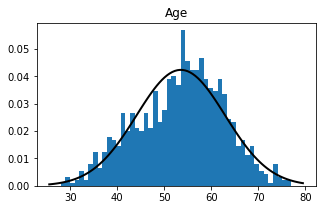

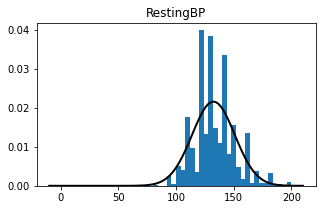

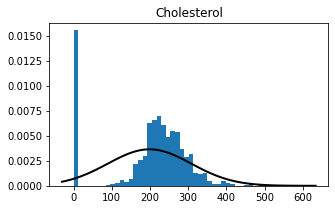

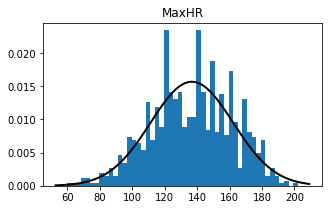

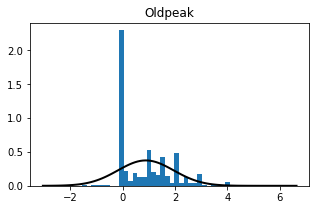

In [33]:
#dataset[numeric_features].hist(bins=50,figsize=(20,12)) 
for clm in numeric_features:
    plt.figure(figsize=(5,3))
    plt.hist(dataset[clm],bins=50,density=1)
    
    mu,std = norm.fit(dataset[clm])

    x_min,x_max = plt.xlim()
    y_min,y_max = plt.ylim()
    x = np.linspace(x_min,x_max,100)
    p = norm.pdf(x,mu,std)
    
    plt.plot(x,p,'k',linewidth=2)
    plt.title(clm)
    plt.show()


Almost all the graph are alike a normal distribution the only 2 that aren't, are the Cholosterol, and the oldpeak.
> In the OldPeak we can see a very big number of values equal to 0, but they can be a result of analisies with the ST-elevation exams.

> There are an enormous number of values equals to 0 in the Colesterol feature,but one can have 0 mmol/dl of colesterol, so we will treat them as missing value.

Let's the features that seem normal distributed and check if they are normal distributed.


> We use Quantile-Quantile Plot, the red line is the normal distribution and the blue point are the point in our distribution, if they match the line or there are only small devation we can say that the features are normal distributed.

> A lot of our numerical features seem to be normal distributed, and only in value that are near the max seem to deviate a little,the only two exception  of this affermation are the features: Cholesterol, and oldPeak.

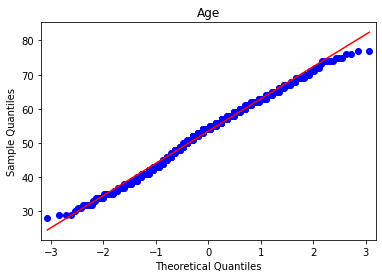

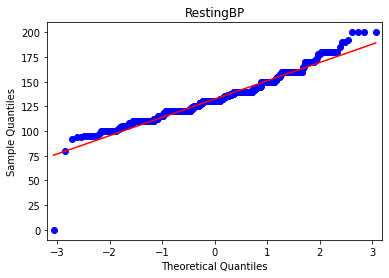

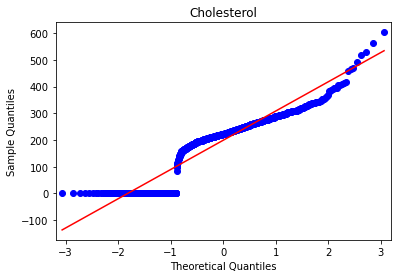

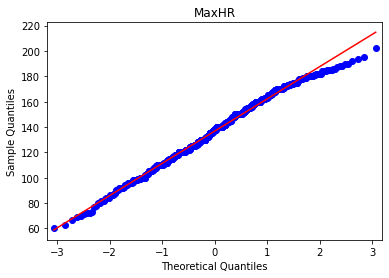

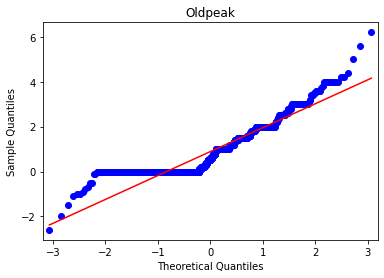

In [34]:
for clm in numeric_features:
    qqplot(dataset[clm], line='s')
    plt.title(clm)
    plt.show()

To test if the data are precisily normal distributute of its possible to use the Statistical Normality Tests, we will use the D’Agostino’s K^2 Test and Shapiro-Wilk Test, but before this we need to standardize our data.
> But because our sample size is not large enough and our distribution are not perfect normal distribution the will fail 

In [35]:
alpha = 0.05

for clm in numeric_features:
    
    normalize_data = (dataset[clm]-dataset[clm].mean())/dataset[clm].std()
    
    stat_k2, p_k2  = normaltest(normalize_data)
    stat_shapiro, p_shapiro  = shapiro(normalize_data)
    
    print("{0}:".format(clm))
    print("\tD'Agostino K^2")
    print("\t\tStatistics = {:.3f}, p = {:.5f}".format(stat_k2,p_k2))
    if p_k2 > alpha:
        print("\t\tThe distribution look like a Normal Distribution (fail to reject H0)")
    else:
        print("\t\tThe distribution does not look like a Normal Distribution (reject H0)")
    
    print("\tShapiro")
    print("\t\tStatistics = {:.3f}, p = {:.5f}".format(stat_shapiro,p_shapiro))
    if p_shapiro > alpha:
        print("\t\tThe distribution look like a Normal Distribution (fail to reject H0)")
    else:
        print("\t\tThe distribution does not look like a Normal Distribution (reject H0)")
        
        
    print("\n")
    

Age:
	D'Agostino K^2
		Statistics = 14.387, p = 0.00075
		The distribution does not look like a Normal Distribution (reject H0)
	Shapiro
		Statistics = 0.991, p = 0.00002
		The distribution does not look like a Normal Distribution (reject H0)


RestingBP:
	D'Agostino K^2
		Statistics = 80.153, p = 0.00000
		The distribution does not look like a Normal Distribution (reject H0)
	Shapiro
		Statistics = 0.958, p = 0.00000
		The distribution does not look like a Normal Distribution (reject H0)


Cholesterol:
	D'Agostino K^2
		Statistics = 50.097, p = 0.00000
		The distribution does not look like a Normal Distribution (reject H0)
	Shapiro
		Statistics = 0.871, p = 0.00000
		The distribution does not look like a Normal Distribution (reject H0)


MaxHR:
	D'Agostino K^2
		Statistics = 15.833, p = 0.00036
		The distribution does not look like a Normal Distribution (reject H0)
	Shapiro
		Statistics = 0.993, p = 0.00017
		The distribution does not look like a Normal Distribution (reject H0)


Oldp

Let's try to remove the 0 outline of cholesterol and replot the graphs.
> We will see that without the 0s the featuare is a lot more alike a normal distribution

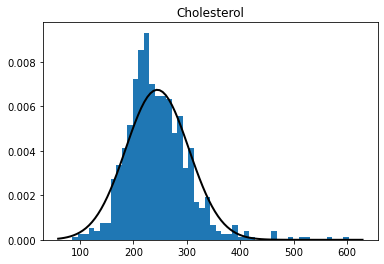

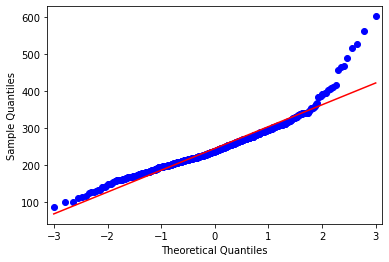

In [36]:
cholesterol = dataset["Cholesterol"]
cholesterol = cholesterol[cholesterol != 0]



mu,std = norm.fit(cholesterol)
plt.hist(cholesterol,bins=50,density=1)

x_min,x_max = plt.xlim()
y_min,y_max = plt.ylim()
x = np.linspace(x_min,x_max,100)
p = norm.pdf(x,mu,std)
plt.plot(x,p,'k',linewidth=2)

plt.title("Cholesterol")
qqplot(cholesterol,line='s')
plt.show()

As we have seen, a lot of our numeric feature are normal distributed enough, now let's try to reduce the little of  skeweens of some features.
> First we will try with log function to reduce right skeweness

> Second with squaring to reduce left skeweness

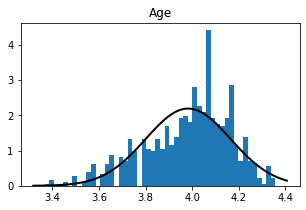

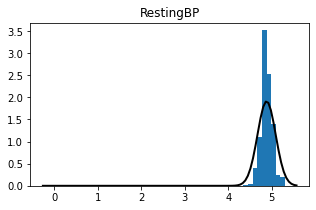

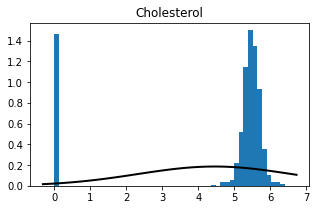

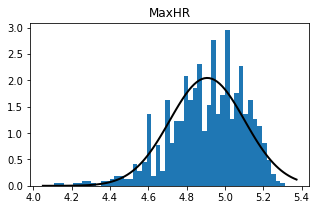

In [37]:
for clm in numeric_features:
    if(dataset[clm].min() < 0): 
        continue
    
    data = np.log1p(dataset[clm])
    plt.figure(figsize=(5,3))
    plt.hist(data,bins=50,density=1)
    
    mu,std = norm.fit(data)

    x_min,x_max = plt.xlim()
    y_min,y_max = plt.ylim()
    x = np.linspace(x_min,x_max,100)
    p = norm.pdf(x,mu,std)
    
    plt.plot(x,p,'k',linewidth=2)
    plt.title(clm)
    plt.show()

The log distribution does not seem to have a positive effect of our distribution

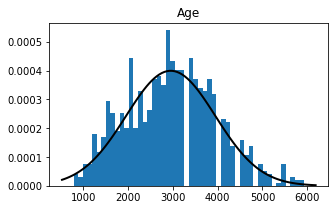

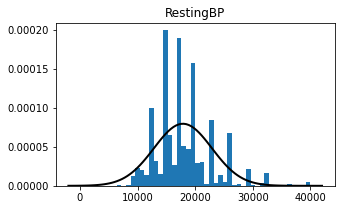

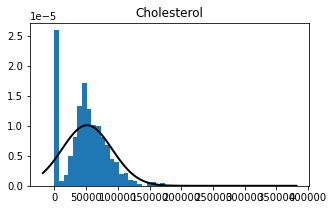

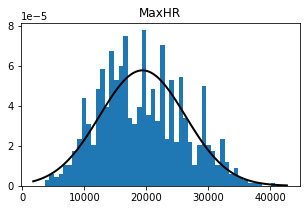

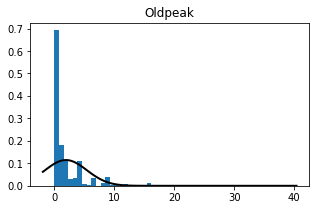

In [38]:
for clm in numeric_features:
    
    data = np.power(dataset[clm],2)
    plt.figure(figsize=(5,3))
    plt.hist(data,bins=50,density=1)
    
    mu,std = norm.fit(data)

    x_min,x_max = plt.xlim()
    y_min,y_max = plt.ylim()
    x = np.linspace(x_min,x_max,100)
    p = norm.pdf(x,mu,std)
    
    plt.plot(x,p,'k',linewidth=2)
    plt.title(clm)
    plt.show()

The squaring seemed to have a little bit of positive effect on MAXHR and a good effect on RestingBP so we will add these features in the dataset

In [39]:
squared_features = ["MaxHR_square","RestingBP_square"]

dataset["MaxHR_square"] = dataset["MaxHR"]**2 
dataset["RestingBP_square"] = dataset["RestingBP"]**2

print(dataset.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  MaxHR_square  \
0              N      0.0       Up             0         29584   
1              N      1.0     Flat             1         24336   
2              N      0.0       Up             0          9604   
3              Y      1.5     Flat             1         11664   
4              N      0.0       Up             0         14884   

   RestingBP_square  
0             19600  
1             25600  
2             16900  
3             19044  
4     

Let 's check the correlation beetween our numeric feature, with a correalation matrix and a heatmap to visualize the corr_matrix

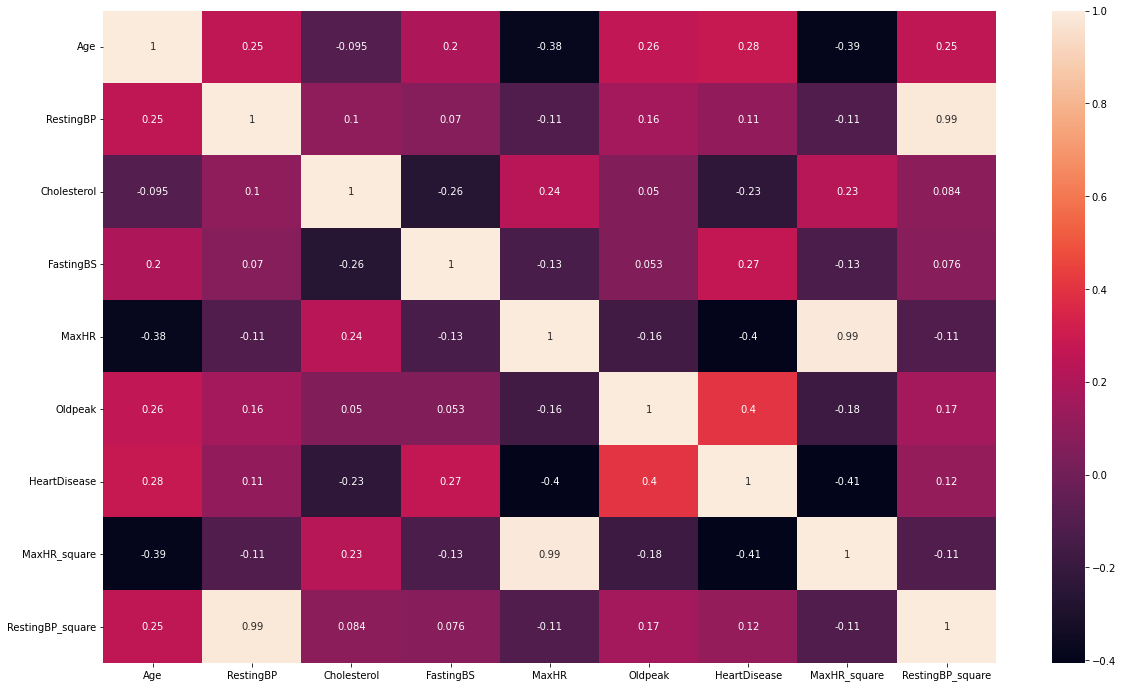

In [40]:
corr = dataset.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True)

As we can see from the HeatMap there isn't a very big correlation beetween the none of the feature, so now let's just visualize a pairplot of all the numeric feature to visualize the data in a plot

<Figure size 1440x864 with 0 Axes>

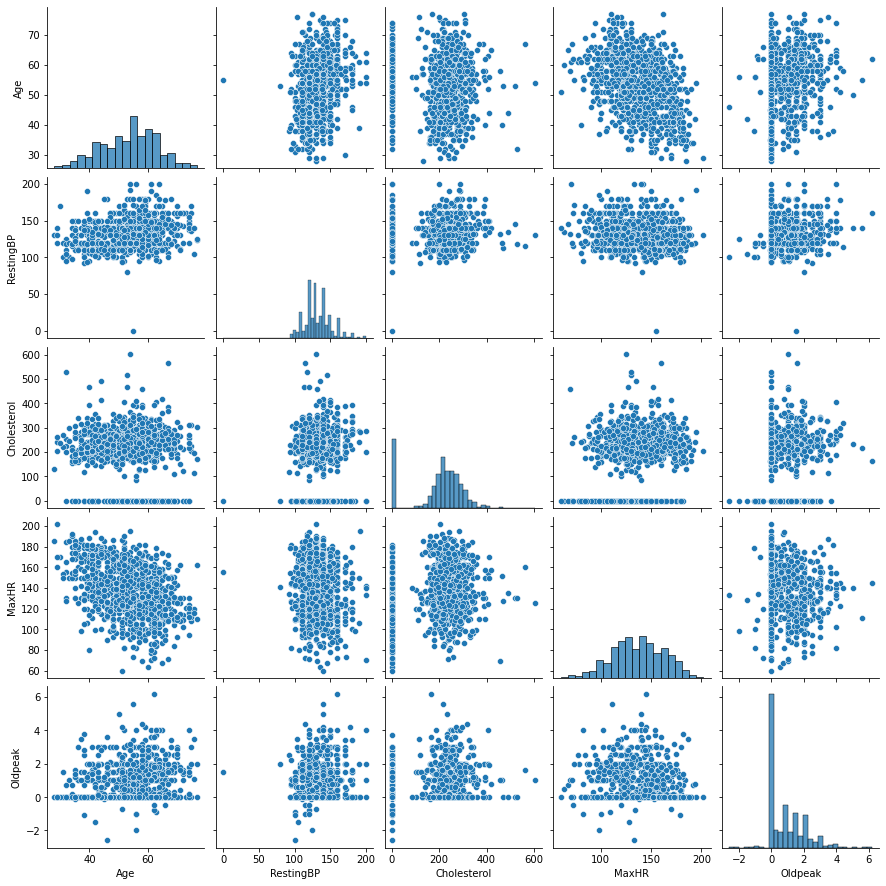

In [42]:
plt.figure(figsize=(20,12))
sns.pairplot(data= dataset[numeric_features])

There is none very obvious correlation beetween data.
<br>So right now lets tackle how to handle the categorical features

In [43]:
print(categorical_features)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


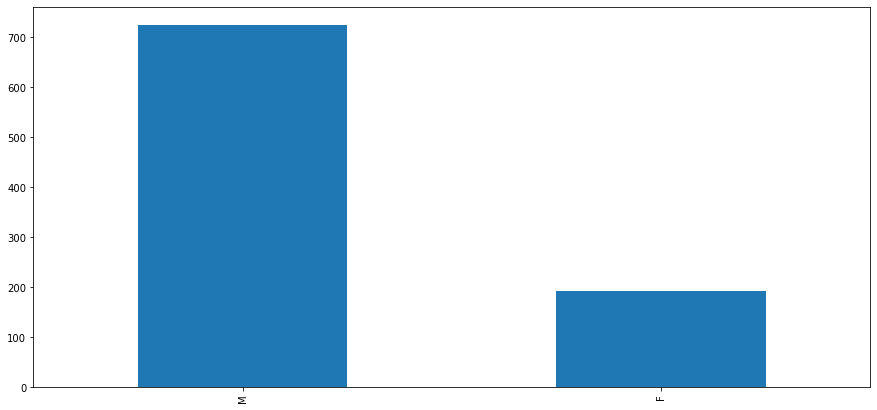

In [82]:
dataset["Sex"].value_counts().plot.bar()

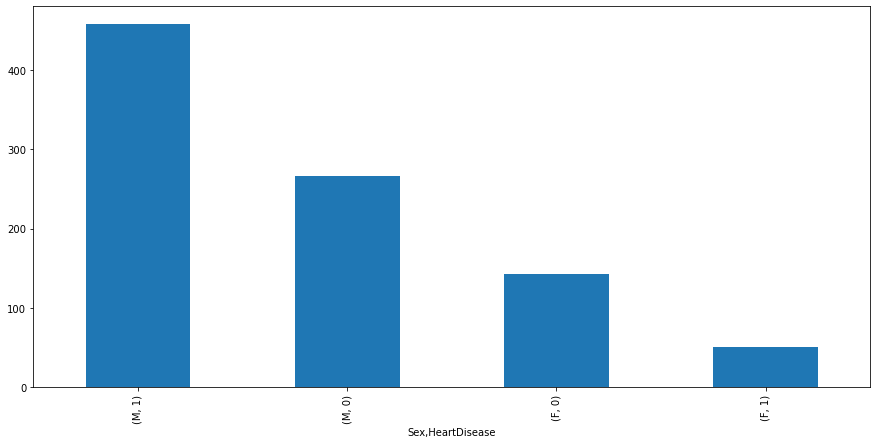

In [83]:
sex_disease_df = dataset[["Sex","HeartDisease"]]

sex_disease_df.value_counts().plot.bar()

In [127]:
male_hd_percentage =  100 * sex_disease_df[(sex_disease_df["Sex"] == "M") & (sex_disease_df["HeartDisease"] == 1 ) ].shape[0] / sex_disease_df[sex_disease_df["Sex"] == "M"].shape[0]
female_hd_percentage = 100 * sex_disease_df[(sex_disease_df["Sex"] == "F") & (sex_disease_df["HeartDisease"] == 1 ) ].shape[0] / sex_disease_df[sex_disease_df["Sex"] == "F"].shape[0]

print("% of male that have from Hearth Disease: {}".format(male_hd_percentage))
print("% of female that have from Hearth Disease: {}".format(female_hd_percentage))

% of male that dies from Hearth Disease: 63.172413793103445
% of female that dies from Hearth Disease: 25.906735751295336


As we can see on the calculation before a lot more male dies from Hearth Disease then women.
Now let's check what how people that die from hearth disease has the different values

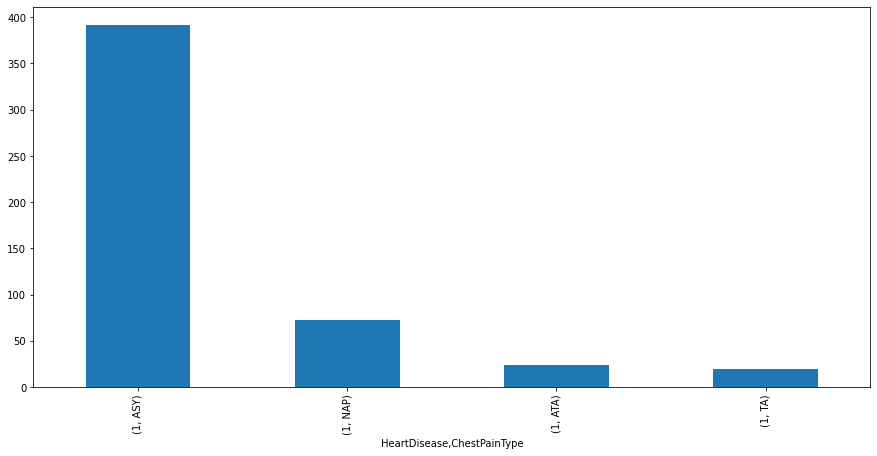

In [131]:
chest_disease_df = dataset[["HeartDisease","ChestPainType"]]

chest_disease_df[chest_disease_df["HeartDisease"] == 1].value_counts().plot.bar()

Mean of Cholesterol of patient with HearthDisease 251.06179775280899
Mean of Cholesterol of patient without HearthDisease 238.76923076923077
Absolute difference of the means 12.292566983578212


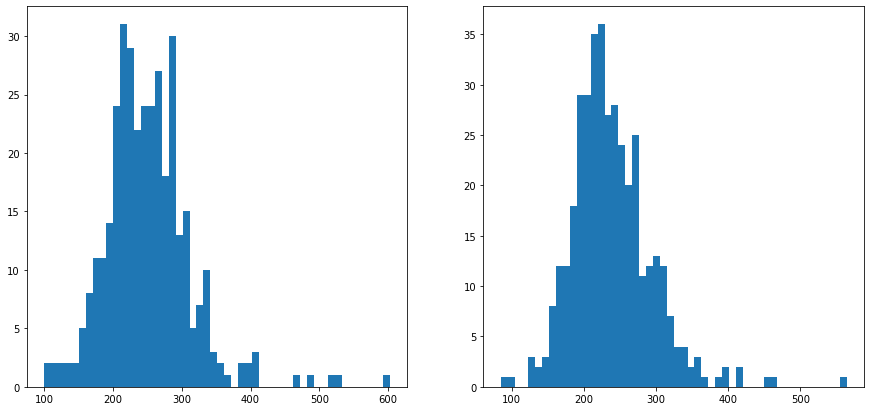

In [161]:
Cholesterol_disease_df = dataset[["HeartDisease","Cholesterol"]]
Cholesterol_disease_df = Cholesterol_disease_df[Cholesterol_disease_df["Cholesterol"] != 0]

Cholesterol_w_disease_df = Cholesterol_disease_df[Cholesterol_disease_df["HeartDisease"] == 1].Cholesterol 
Cholesterol_wo_disease_df = Cholesterol_disease_df[Cholesterol_disease_df["HeartDisease"] == 0].Cholesterol 

#Removing 0 value because give no information and they are missing value

fig,ax = plt.subplots(nrows=1,ncols=2)
ax[0].hist(Cholesterol_w_disease_df,bins=50)
ax[1].hist(Cholesterol_wo_disease_df,bins=50)

print("Mean of Cholesterol of patient with HearthDisease {}".format(Cholesterol_w_disease_df.mean()) )
print("Mean of Cholesterol of patient without HearthDisease {}".format(Cholesterol_wo_disease_df.mean()))
print("Absolute difference of the means {}".format(np.abs(Cholesterol_w_disease_df.mean() - Cholesterol_wo_disease_df.mean())))


Mean of MaxHR of patient with HearthDisease 127.65551181102362
Mean of MaxHR of patient without HearthDisease 148.15121951219513
Absolute difference of the means 20.49570770117151


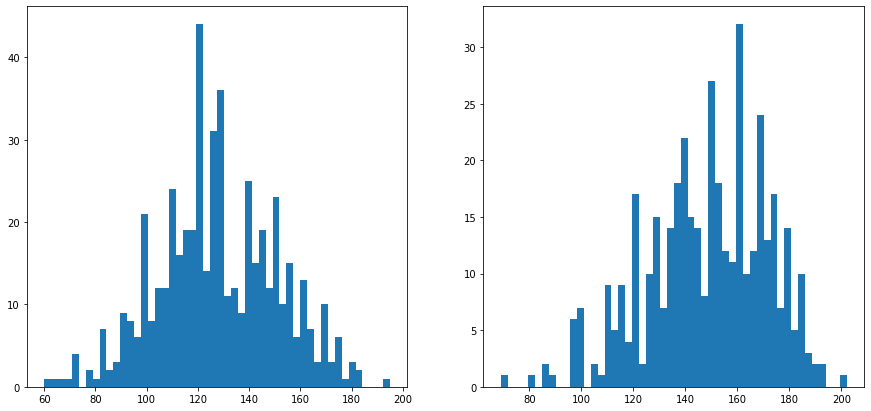

In [162]:
max_hr_disease_df = dataset[["HeartDisease","MaxHR"]]
max_hr_w_disease_df = (max_hr_disease_df[max_hr_disease_df["HeartDisease"] == 1]).MaxHR
max_hr_wo_disease_df = (max_hr_disease_df[max_hr_disease_df["HeartDisease"] == 0]).MaxHR


fig,ax = plt.subplots(nrows=1,ncols=2)
ax[0].hist(max_hr_w_disease_df,bins=50)
ax[1].hist(max_hr_wo_disease_df,bins=50)

print("Mean of MaxHR of patient with HearthDisease {}".format(max_hr_w_disease_df.mean()) )
print("Mean of MaxHR of patient without HearthDisease {}".format(max_hr_wo_disease_df.mean()) )
print("Absolute difference of the means {}".format(np.abs(max_hr_w_disease_df.mean() - max_hr_wo_disease_df.mean())))


<BarContainer object of 2 artists>

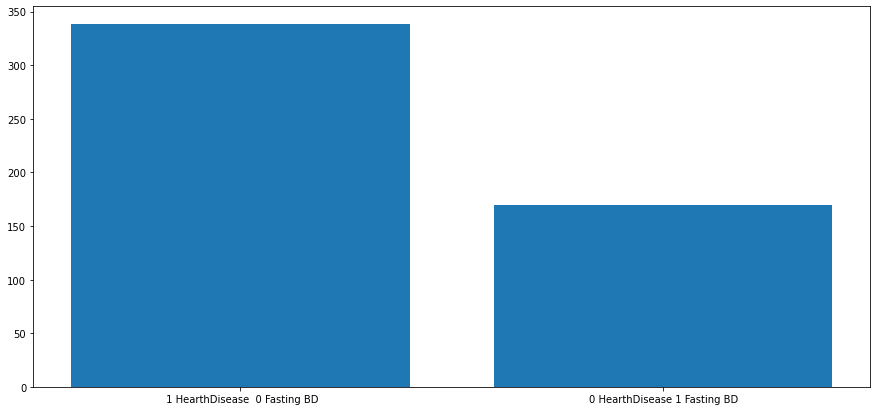

In [143]:
FBS_disease_df = dataset[["HeartDisease","FastingBS"]]


plt.bar(["HeartDisease","FastingBS"],height=FBS_disease_df[chest_disease_df["HeartDisease"] == 1].value_counts(),tick_label=[" 1 HearthDisease  0 Fasting BD","0 HearthDisease 1 Fasting BD"])   


As we could see in the categorical graph, it seems that there is some correllation from Having an Hearth Disease and some feature,and in the numerical feature when comparing the histogram of the of the patients with the Heart disease and without the Heart disease there is a little shift of the mean. 

Now let's encode all the categorical feature, we will use a simple One Hot Encode because no one of the categorical feature has a high number of unique value to encode.

In [300]:
column_to_encode_as_dummy = ["RestingECG","ChestPainType","ST_Slope","ExerciseAngina"]
column_encoded_as_bool = ["Sex"]
encoded_dataset =  pd.get_dummies(dataset,columns=column_to_encode_as_dummy)
encoded_dataset["Sex"] =  [ 0 if x is "F" else 1  for x in encoded_dataset["Sex"]]
encoded_dataset = encoded_dataset.drop(column_to_encode_as_dummy,errors='ignore')
print(encoded_dataset.head())

   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40    1        140          289          0    172      0.0             0   
1   49    0        160          180          0    156      1.0             1   
2   37    1        130          283          0     98      0.0             0   
3   48    0        138          214          0    108      1.5             1   
4   54    1        150          195          0    122      0.0             0   

   MaxHR_square  RestingBP_square  ...  RestingECG_ST  ChestPainType_ASY  \
0         29584             19600  ...              0                  0   
1         24336             25600  ...              0                  0   
2          9604             16900  ...              1                  0   
3         11664             19044  ...              0                  1   
4         14884             22500  ...              0                  0   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  ST_

Now that we have encoded all the variables , let's split the dataset so we can normalize it and working on the missing value

In [301]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
dataset_prepared = encoded_dataset.drop("HeartDisease",axis=1)
dataset_prepared = encoded_dataset[encoded_dataset["Cholesterol"]  != 0]
train_set,test_set = train_test_split(dataset_prepared,test_size = 0.1)



After we split our dataset, split the input vector , and the output label  so we can predict our values

In [236]:
numeric_feature_to_predict_chl = (numeric_features+squared_features)
numeric_feature_to_predict_chl.remove("Cholesterol")

scaler  = StandardScaler()
x_train_set_ch = train_set.drop(["Cholesterol"],axis=1)
y_train_set_ch = train_set["Cholesterol"]

x_test_set_ch = test_set.drop(["Cholesterol"],axis=1)
y_test_set_ch = test_set["Cholesterol"]

x_train_set_ch_standardized = x_train_set_ch
x_train_set_ch_standardized[numeric_feature_to_predict_chl] = scaler.fit_transform( x_train_set_ch[numeric_feature_to_predict_chl]) 

x_test_set_ch_standardized = x_test_set_ch
x_test_set_ch_standardized[numeric_feature_to_predict_chl] = scaler.transform( x_test_set_ch_standardized[numeric_feature_to_predict_chl])  
#x_train_set_standardized = pd.DataFrame(x_train_set_standardized, index=x_train_set.index, columns=x_train_set.columns)
print(x_train_set_ch_standardized.head())

          Age  Sex  RestingBP  FastingBS     MaxHR   Oldpeak  HeartDisease  \
619  2.188913    0  -0.666845          0 -0.591148 -0.656083             0   
312 -1.335536    1  -0.395615          1  1.555774  0.649760             1   
446  0.052884    1  -0.124385          0 -0.747288  0.463211             1   
424  0.693692    1  -0.666845          1  0.189551  1.022858             1   
748  1.120898    1  -0.666845          0 -1.567022  1.209407             1   

     MaxHR_square  RestingBP_square  RestingECG_LVH  ...  RestingECG_ST  \
619     -0.655804         -0.690096               1  ...              0   
312      1.698350         -0.444440               0  ...              0   
446     -0.793004         -0.188757               0  ...              1   
424      0.099370         -0.690096               0  ...              0   
748     -1.437640         -0.690096               1  ...              0   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
619             

Now we need to predict our Cholesterol we are trying with simple algorithm

At first we will try with a simple Linear Regression

In [286]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train_set_ch_standardized,y_train_set_ch)

LinearRegression()

In [283]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU,Dropout
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.regularizers import l2
nn_large_model = Sequential([
    Dense(100, kernel_initializer=HeNormal(),kernel_regularizer=l2(0.001),input_shape=(x_train_set_ch_standardized.shape[1],)),
    ReLU(),
    Dropout(0.5),
    Dense(50,kernel_initializer=HeNormal(),kernel_regularizer=l2(0.001)),
    ReLU(),
    Dropout(0.5),
    Dense(20,kernel_initializer=HeNormal(),kernel_regularizer=l2(0.001)),
    ReLU(),
    Dropout(0.5),
    Dense(1,kernel_initializer=HeNormal(),kernel_regularizer=l2(0.001)),
])

nn_tiny_model = Sequential([
    Dense(30, kernel_initializer=HeNormal(),kernel_regularizer=l2(0.001),input_shape=(x_train_set_ch_standardized.shape[1],)),
    ReLU(),
    Dense(15,kernel_initializer=HeNormal(),kernel_regularizer=l2(0.001)),
    ReLU(),
    Dense(10,kernel_initializer=HeNormal(),kernel_regularizer=l2(0.001)),
    ReLU(),
    Dense(1,kernel_initializer=HeNormal(),kernel_regularizer=l2(0.001)),
])

nn_large_model.compile(optimizer="Adam", loss="mean_squared_error", metrics=[RootMeanSquaredError()])
nn_tiny_model.compile(optimizer="Adam", loss="mean_squared_error", metrics=[RootMeanSquaredError()])

nn_large_model.fit(x_train_set_ch_standardized,y_train_set_ch,epochs=2000,callbacks=[EarlyStopping(patience=100,monitor='loss')])
nn_tiny_model.fit(x_train_set_ch_standardized,y_train_set_ch,epochs=2000,callbacks=[EarlyStopping(patience=100,monitor='loss')])


Epoch 1/2000
26/26 [==============================] - 0s 2ms/step - loss: 51763.2773 - root_mean_squared_error: 227.5147
Epoch 2/2000
26/26 [==============================] - 0s 2ms/step - loss: 50290.4570 - root_mean_squared_error: 224.2546
Epoch 3/2000
26/26 [==============================] - 0s 2ms/step - loss: 47345.7930 - root_mean_squared_error: 217.5901
Epoch 4/2000
26/26 [==============================] - 0s 2ms/step - loss: 39880.4219 - root_mean_squared_error: 199.7000
Epoch 5/2000
26/26 [==============================] - 0s 2ms/step - loss: 28365.5664 - root_mean_squared_error: 168.4197
Epoch 6/2000
26/26 [==============================] - 0s 2ms/step - loss: 21436.8516 - root_mean_squared_error: 146.4120
Epoch 7/2000
26/26 [==============================] - 0s 2ms/step - loss: 20452.4648 - root_mean_squared_error: 143.0107
Epoch 8/2000
26/26 [==============================] - 0s 2ms/step - loss: 19327.9551 - root_mean_squared_error: 139.0236
Epoch 9/2000
26/26 [============

26/26 [==============================] - 0s 2ms/step - loss: 14029.0752 - root_mean_squared_error: 118.4426
Epoch 69/2000
26/26 [==============================] - 0s 2ms/step - loss: 13578.8027 - root_mean_squared_error: 116.5263
Epoch 70/2000
26/26 [==============================] - 0s 2ms/step - loss: 13851.1396 - root_mean_squared_error: 117.6890
Epoch 71/2000
26/26 [==============================] - 0s 2ms/step - loss: 13827.3047 - root_mean_squared_error: 117.5877
Epoch 72/2000
26/26 [==============================] - 0s 2ms/step - loss: 13835.7607 - root_mean_squared_error: 117.6237
Epoch 73/2000
26/26 [==============================] - 0s 2ms/step - loss: 13932.1709 - root_mean_squared_error: 118.0328
Epoch 74/2000
26/26 [==============================] - 0s 2ms/step - loss: 12762.2637 - root_mean_squared_error: 112.9683
Epoch 75/2000
26/26 [==============================] - 0s 2ms/step - loss: 13155.1260 - root_mean_squared_error: 114.6939
Epoch 76/2000
26/26 [=================

Epoch 135/2000
26/26 [==============================] - 0s 2ms/step - loss: 12807.6162 - root_mean_squared_error: 113.1687
Epoch 136/2000
26/26 [==============================] - 0s 2ms/step - loss: 13127.6221 - root_mean_squared_error: 114.5738
Epoch 137/2000
26/26 [==============================] - 0s 2ms/step - loss: 12279.5283 - root_mean_squared_error: 110.8110
Epoch 138/2000
26/26 [==============================] - 0s 2ms/step - loss: 13596.5088 - root_mean_squared_error: 116.6021
Epoch 139/2000
26/26 [==============================] - 0s 2ms/step - loss: 11771.5020 - root_mean_squared_error: 108.4944
Epoch 140/2000
26/26 [==============================] - 0s 2ms/step - loss: 12082.9033 - root_mean_squared_error: 109.9202
Epoch 141/2000
26/26 [==============================] - 0s 2ms/step - loss: 13073.2109 - root_mean_squared_error: 114.3361
Epoch 142/2000
26/26 [==============================] - 0s 2ms/step - loss: 13415.1865 - root_mean_squared_error: 115.8220
Epoch 143/2000
2

26/26 [==============================] - 0s 2ms/step - loss: 12619.9287 - root_mean_squared_error: 112.3363
Epoch 202/2000
26/26 [==============================] - 0s 2ms/step - loss: 13339.4834 - root_mean_squared_error: 115.4946
Epoch 203/2000
26/26 [==============================] - 0s 2ms/step - loss: 11652.9580 - root_mean_squared_error: 107.9466
Epoch 204/2000
26/26 [==============================] - 0s 2ms/step - loss: 12218.3721 - root_mean_squared_error: 110.5346
Epoch 205/2000
26/26 [==============================] - 0s 2ms/step - loss: 12828.9902 - root_mean_squared_error: 113.2630
Epoch 206/2000
26/26 [==============================] - 0s 2ms/step - loss: 12224.0312 - root_mean_squared_error: 110.5602
Epoch 207/2000
26/26 [==============================] - 0s 2ms/step - loss: 12215.0820 - root_mean_squared_error: 110.5197
Epoch 208/2000
26/26 [==============================] - 0s 2ms/step - loss: 11735.4492 - root_mean_squared_error: 108.3280
Epoch 209/2000
26/26 [=========

26/26 [==============================] - 0s 2ms/step - loss: 11683.3604 - root_mean_squared_error: 108.0872
Epoch 268/2000
26/26 [==============================] - 0s 2ms/step - loss: 12268.7930 - root_mean_squared_error: 110.7623
Epoch 269/2000
26/26 [==============================] - 0s 2ms/step - loss: 12254.6143 - root_mean_squared_error: 110.6983
Epoch 270/2000
26/26 [==============================] - 0s 2ms/step - loss: 12034.0840 - root_mean_squared_error: 109.6977
Epoch 271/2000
26/26 [==============================] - 0s 2ms/step - loss: 12534.5420 - root_mean_squared_error: 111.9555
Epoch 272/2000
26/26 [==============================] - 0s 2ms/step - loss: 12084.0693 - root_mean_squared_error: 109.9252
Epoch 273/2000
26/26 [==============================] - 0s 2ms/step - loss: 12125.8740 - root_mean_squared_error: 110.1152
Epoch 274/2000
26/26 [==============================] - 0s 2ms/step - loss: 11819.8936 - root_mean_squared_error: 108.7170
Epoch 275/2000
26/26 [=========

26/26 [==============================] - 0s 2ms/step - loss: 12101.5342 - root_mean_squared_error: 110.0045
Epoch 334/2000
26/26 [==============================] - 0s 2ms/step - loss: 11641.7861 - root_mean_squared_error: 107.8946
Epoch 335/2000
26/26 [==============================] - 0s 2ms/step - loss: 11285.5000 - root_mean_squared_error: 106.2307
Epoch 336/2000
26/26 [==============================] - 0s 2ms/step - loss: 11694.0400 - root_mean_squared_error: 108.1365
Epoch 337/2000
26/26 [==============================] - 0s 2ms/step - loss: 12232.5391 - root_mean_squared_error: 110.5984
Epoch 338/2000
26/26 [==============================] - 0s 2ms/step - loss: 11474.9590 - root_mean_squared_error: 107.1187
Epoch 339/2000
26/26 [==============================] - 0s 2ms/step - loss: 11272.9336 - root_mean_squared_error: 106.1715
Epoch 340/2000
26/26 [==============================] - 0s 2ms/step - loss: 11524.2285 - root_mean_squared_error: 107.3484
Epoch 341/2000
26/26 [=========

26/26 [==============================] - 0s 2ms/step - loss: 11790.6914 - root_mean_squared_error: 108.5823
Epoch 400/2000
26/26 [==============================] - 0s 2ms/step - loss: 11489.6006 - root_mean_squared_error: 107.1869
Epoch 401/2000
26/26 [==============================] - 0s 2ms/step - loss: 11621.9277 - root_mean_squared_error: 107.8024
Epoch 402/2000
26/26 [==============================] - 0s 2ms/step - loss: 12176.5742 - root_mean_squared_error: 110.3449
Epoch 403/2000
26/26 [==============================] - 0s 2ms/step - loss: 11722.8779 - root_mean_squared_error: 108.2696
Epoch 404/2000
26/26 [==============================] - 0s 2ms/step - loss: 12071.0068 - root_mean_squared_error: 109.8655
Epoch 405/2000
26/26 [==============================] - 0s 2ms/step - loss: 11152.4297 - root_mean_squared_error: 105.6023
Epoch 406/2000
26/26 [==============================] - 0s 2ms/step - loss: 11215.3652 - root_mean_squared_error: 105.8999
Epoch 407/2000
26/26 [=========

26/26 [==============================] - 0s 2ms/step - loss: 10953.8320 - root_mean_squared_error: 104.6576
Epoch 466/2000
26/26 [==============================] - 0s 2ms/step - loss: 10606.7627 - root_mean_squared_error: 102.9862
Epoch 467/2000
26/26 [==============================] - 0s 2ms/step - loss: 10432.1953 - root_mean_squared_error: 102.1351
Epoch 468/2000
26/26 [==============================] - 0s 2ms/step - loss: 10851.4756 - root_mean_squared_error: 104.1675
Epoch 469/2000
26/26 [==============================] - 0s 2ms/step - loss: 10453.9053 - root_mean_squared_error: 102.2413
Epoch 470/2000
26/26 [==============================] - 0s 2ms/step - loss: 10472.5918 - root_mean_squared_error: 102.3327
Epoch 471/2000
26/26 [==============================] - 0s 2ms/step - loss: 10874.5605 - root_mean_squared_error: 104.2782
Epoch 472/2000
26/26 [==============================] - 0s 2ms/step - loss: 10546.6367 - root_mean_squared_error: 102.6938
Epoch 473/2000
26/26 [=========

26/26 [==============================] - 0s 1ms/step - loss: 10820.0742 - root_mean_squared_error: 104.0164
Epoch 532/2000
26/26 [==============================] - 0s 1ms/step - loss: 10208.7988 - root_mean_squared_error: 101.0353
Epoch 533/2000
26/26 [==============================] - 0s 1ms/step - loss: 11140.9951 - root_mean_squared_error: 105.5478
Epoch 534/2000
26/26 [==============================] - 0s 1ms/step - loss: 10333.1367 - root_mean_squared_error: 101.6488
Epoch 535/2000
26/26 [==============================] - 0s 2ms/step - loss: 11325.5674 - root_mean_squared_error: 106.4185
Epoch 536/2000
26/26 [==============================] - 0s 1ms/step - loss: 10021.6807 - root_mean_squared_error: 100.1050
Epoch 537/2000
26/26 [==============================] - 0s 2ms/step - loss: 10700.6406 - root_mean_squared_error: 103.4407
Epoch 538/2000
26/26 [==============================] - 0s 2ms/step - loss: 10475.4229 - root_mean_squared_error: 102.3462
Epoch 539/2000
26/26 [=========

26/26 [==============================] - 0s 1ms/step - loss: 9814.0283 - root_mean_squared_error: 99.0621
Epoch 598/2000
26/26 [==============================] - 0s 2ms/step - loss: 11387.6914 - root_mean_squared_error: 106.7097
Epoch 599/2000
26/26 [==============================] - 0s 1ms/step - loss: 10488.9160 - root_mean_squared_error: 102.4119
Epoch 600/2000
26/26 [==============================] - 0s 1ms/step - loss: 9814.9033 - root_mean_squared_error: 99.0665
Epoch 601/2000
26/26 [==============================] - 0s 1ms/step - loss: 10523.4863 - root_mean_squared_error: 102.5805
Epoch 602/2000
26/26 [==============================] - 0s 2ms/step - loss: 10377.5869 - root_mean_squared_error: 101.8669
Epoch 603/2000
26/26 [==============================] - 0s 2ms/step - loss: 10104.0928 - root_mean_squared_error: 100.5155
Epoch 604/2000
26/26 [==============================] - 0s 1ms/step - loss: 10444.9297 - root_mean_squared_error: 102.1969
Epoch 605/2000
26/26 [=============

26/26 [==============================] - 0s 1ms/step - loss: 9501.5264 - root_mean_squared_error: 97.4717
Epoch 665/2000
26/26 [==============================] - 0s 2ms/step - loss: 10297.3652 - root_mean_squared_error: 101.4721
Epoch 666/2000
26/26 [==============================] - 0s 1ms/step - loss: 9947.1045 - root_mean_squared_error: 99.7312
Epoch 667/2000
26/26 [==============================] - 0s 2ms/step - loss: 9912.4648 - root_mean_squared_error: 99.5574
Epoch 668/2000
26/26 [==============================] - 0s 2ms/step - loss: 10020.0723 - root_mean_squared_error: 100.0964
Epoch 669/2000
26/26 [==============================] - 0s 1ms/step - loss: 10234.2207 - root_mean_squared_error: 101.1604
Epoch 670/2000
26/26 [==============================] - 0s 2ms/step - loss: 9644.7793 - root_mean_squared_error: 98.2038
Epoch 671/2000
26/26 [==============================] - 0s 2ms/step - loss: 9558.6631 - root_mean_squared_error: 97.7644
Epoch 672/2000
26/26 [===================

26/26 [==============================] - 0s 2ms/step - loss: 9171.3428 - root_mean_squared_error: 95.7627
Epoch 732/2000
26/26 [==============================] - 0s 2ms/step - loss: 10254.0020 - root_mean_squared_error: 101.2578
Epoch 733/2000
26/26 [==============================] - 0s 2ms/step - loss: 9621.7539 - root_mean_squared_error: 98.0862
Epoch 734/2000
26/26 [==============================] - 0s 2ms/step - loss: 10145.9795 - root_mean_squared_error: 100.7230
Epoch 735/2000
26/26 [==============================] - 0s 2ms/step - loss: 9540.2461 - root_mean_squared_error: 97.6698
Epoch 736/2000
26/26 [==============================] - 0s 2ms/step - loss: 10307.3682 - root_mean_squared_error: 101.5210
Epoch 737/2000
26/26 [==============================] - 0s 2ms/step - loss: 10095.7979 - root_mean_squared_error: 100.4736
Epoch 738/2000
26/26 [==============================] - 0s 2ms/step - loss: 9785.8369 - root_mean_squared_error: 98.9190
Epoch 739/2000
26/26 [=================

26/26 [==============================] - 0s 2ms/step - loss: 9901.8086 - root_mean_squared_error: 99.5032
Epoch 799/2000
26/26 [==============================] - 0s 2ms/step - loss: 9992.7422 - root_mean_squared_error: 99.9591
Epoch 800/2000
26/26 [==============================] - 0s 2ms/step - loss: 9704.2969 - root_mean_squared_error: 98.5057
Epoch 801/2000
26/26 [==============================] - 0s 2ms/step - loss: 10073.0889 - root_mean_squared_error: 100.3602
Epoch 802/2000
26/26 [==============================] - 0s 2ms/step - loss: 9993.8574 - root_mean_squared_error: 99.9647
Epoch 803/2000
26/26 [==============================] - 0s 2ms/step - loss: 9724.5732 - root_mean_squared_error: 98.6086
Epoch 804/2000
26/26 [==============================] - 0s 2ms/step - loss: 9322.8262 - root_mean_squared_error: 96.5500
Epoch 805/2000
26/26 [==============================] - 0s 2ms/step - loss: 9533.4023 - root_mean_squared_error: 97.6344
Epoch 806/2000
26/26 [=======================

26/26 [==============================] - 0s 1ms/step - loss: 10820.2314 - root_mean_squared_error: 104.0195
Epoch 23/2000
26/26 [==============================] - 0s 1ms/step - loss: 10706.3643 - root_mean_squared_error: 103.4707
Epoch 24/2000
26/26 [==============================] - 0s 1ms/step - loss: 10610.2559 - root_mean_squared_error: 103.0052
Epoch 25/2000
26/26 [==============================] - 0s 2ms/step - loss: 10526.0869 - root_mean_squared_error: 102.5959
Epoch 26/2000
26/26 [==============================] - 0s 1ms/step - loss: 10413.5615 - root_mean_squared_error: 102.0460
Epoch 27/2000
26/26 [==============================] - 0s 1ms/step - loss: 10337.7559 - root_mean_squared_error: 101.6739
Epoch 28/2000
26/26 [==============================] - 0s 1ms/step - loss: 10257.9561 - root_mean_squared_error: 101.2807
Epoch 29/2000
26/26 [==============================] - 0s 1ms/step - loss: 10179.1914 - root_mean_squared_error: 100.8911
Epoch 30/2000
26/26 [=================

26/26 [==============================] - 0s 1ms/step - loss: 8626.6963 - root_mean_squared_error: 92.8787
Epoch 91/2000
26/26 [==============================] - 0s 2ms/step - loss: 8629.5020 - root_mean_squared_error: 92.8938
Epoch 92/2000
26/26 [==============================] - 0s 1ms/step - loss: 8627.2178 - root_mean_squared_error: 92.8815
Epoch 93/2000
26/26 [==============================] - 0s 1ms/step - loss: 8606.5850 - root_mean_squared_error: 92.7704
Epoch 94/2000
26/26 [==============================] - 0s 1ms/step - loss: 8577.9297 - root_mean_squared_error: 92.6158
Epoch 95/2000
26/26 [==============================] - 0s 1ms/step - loss: 8568.5215 - root_mean_squared_error: 92.5650
Epoch 96/2000
26/26 [==============================] - 0s 1ms/step - loss: 8552.8818 - root_mean_squared_error: 92.4805
Epoch 97/2000
26/26 [==============================] - 0s 1ms/step - loss: 8577.8350 - root_mean_squared_error: 92.6153
Epoch 98/2000
26/26 [==============================] -

26/26 [==============================] - 0s 2ms/step - loss: 7939.7900 - root_mean_squared_error: 89.1038
Epoch 158/2000
26/26 [==============================] - 0s 2ms/step - loss: 7899.7930 - root_mean_squared_error: 88.8791
Epoch 159/2000
26/26 [==============================] - 0s 1ms/step - loss: 7898.5117 - root_mean_squared_error: 88.8719
Epoch 160/2000
26/26 [==============================] - 0s 1ms/step - loss: 7896.2349 - root_mean_squared_error: 88.8591
Epoch 161/2000
26/26 [==============================] - 0s 1ms/step - loss: 7880.1167 - root_mean_squared_error: 88.7683
Epoch 162/2000
26/26 [==============================] - 0s 1ms/step - loss: 7876.6626 - root_mean_squared_error: 88.7489
Epoch 163/2000
26/26 [==============================] - 0s 1ms/step - loss: 7858.0850 - root_mean_squared_error: 88.6442
Epoch 164/2000
26/26 [==============================] - 0s 1ms/step - loss: 7848.8442 - root_mean_squared_error: 88.5920
Epoch 165/2000
26/26 [=========================

26/26 [==============================] - 0s 1ms/step - loss: 7244.6187 - root_mean_squared_error: 85.1132
Epoch 225/2000
26/26 [==============================] - 0s 2ms/step - loss: 7214.3594 - root_mean_squared_error: 84.9353
Epoch 226/2000
26/26 [==============================] - 0s 1ms/step - loss: 7205.7070 - root_mean_squared_error: 84.8843
Epoch 227/2000
26/26 [==============================] - 0s 1ms/step - loss: 7205.3379 - root_mean_squared_error: 84.8822
Epoch 228/2000
26/26 [==============================] - 0s 1ms/step - loss: 7174.7197 - root_mean_squared_error: 84.7016
Epoch 229/2000
26/26 [==============================] - 0s 1ms/step - loss: 7181.6846 - root_mean_squared_error: 84.7427
Epoch 230/2000
26/26 [==============================] - 0s 1ms/step - loss: 7166.5439 - root_mean_squared_error: 84.6533
Epoch 231/2000
26/26 [==============================] - 0s 1ms/step - loss: 7165.0713 - root_mean_squared_error: 84.6446
Epoch 232/2000
26/26 [=========================

26/26 [==============================] - 0s 2ms/step - loss: 6658.9287 - root_mean_squared_error: 81.5997
Epoch 292/2000
26/26 [==============================] - 0s 1ms/step - loss: 6602.4873 - root_mean_squared_error: 81.2531
Epoch 293/2000
26/26 [==============================] - 0s 2ms/step - loss: 6560.4526 - root_mean_squared_error: 80.9941
Epoch 294/2000
26/26 [==============================] - 0s 1ms/step - loss: 6589.1572 - root_mean_squared_error: 81.1711
Epoch 295/2000
26/26 [==============================] - 0s 2ms/step - loss: 6548.9619 - root_mean_squared_error: 80.9231
Epoch 296/2000
26/26 [==============================] - 0s 1ms/step - loss: 6575.4839 - root_mean_squared_error: 81.0868
Epoch 297/2000
26/26 [==============================] - 0s 1ms/step - loss: 6539.1484 - root_mean_squared_error: 80.8624
Epoch 298/2000
26/26 [==============================] - 0s 2ms/step - loss: 6531.8022 - root_mean_squared_error: 80.8170
Epoch 299/2000
26/26 [=========================

26/26 [==============================] - 0s 2ms/step - loss: 6116.6064 - root_mean_squared_error: 78.2058
Epoch 359/2000
26/26 [==============================] - 0s 1ms/step - loss: 6074.7861 - root_mean_squared_error: 77.9379
Epoch 360/2000
26/26 [==============================] - 0s 1ms/step - loss: 6102.0547 - root_mean_squared_error: 78.1127
Epoch 361/2000
26/26 [==============================] - 0s 1ms/step - loss: 6083.7910 - root_mean_squared_error: 77.9957
Epoch 362/2000
26/26 [==============================] - 0s 1ms/step - loss: 6132.4023 - root_mean_squared_error: 78.3067
Epoch 363/2000
26/26 [==============================] - 0s 1ms/step - loss: 6060.9082 - root_mean_squared_error: 77.8488
Epoch 364/2000
26/26 [==============================] - 0s 1ms/step - loss: 6180.2881 - root_mean_squared_error: 78.6118
Epoch 365/2000
26/26 [==============================] - 0s 1ms/step - loss: 6085.3906 - root_mean_squared_error: 78.0059
Epoch 366/2000
26/26 [=========================

26/26 [==============================] - 0s 2ms/step - loss: 5783.0698 - root_mean_squared_error: 76.0432
Epoch 426/2000
26/26 [==============================] - 0s 2ms/step - loss: 5793.4243 - root_mean_squared_error: 76.1112
Epoch 427/2000
26/26 [==============================] - 0s 1ms/step - loss: 5724.1333 - root_mean_squared_error: 75.6547
Epoch 428/2000
26/26 [==============================] - 0s 1ms/step - loss: 5690.3076 - root_mean_squared_error: 75.4308
Epoch 429/2000
26/26 [==============================] - 0s 1ms/step - loss: 5755.5405 - root_mean_squared_error: 75.8620
Epoch 430/2000
26/26 [==============================] - 0s 1ms/step - loss: 5769.3809 - root_mean_squared_error: 75.9531
Epoch 431/2000
26/26 [==============================] - 0s 1ms/step - loss: 5706.1777 - root_mean_squared_error: 75.5359
Epoch 432/2000
26/26 [==============================] - 0s 1ms/step - loss: 5747.1016 - root_mean_squared_error: 75.8063
Epoch 433/2000
26/26 [=========================

26/26 [==============================] - 0s 2ms/step - loss: 5401.2026 - root_mean_squared_error: 73.4892
Epoch 493/2000
26/26 [==============================] - 0s 1ms/step - loss: 5386.9775 - root_mean_squared_error: 73.3924
Epoch 494/2000
26/26 [==============================] - 0s 1ms/step - loss: 5431.7769 - root_mean_squared_error: 73.6970
Epoch 495/2000
26/26 [==============================] - 0s 1ms/step - loss: 5399.2725 - root_mean_squared_error: 73.4761
Epoch 496/2000
26/26 [==============================] - 0s 1ms/step - loss: 5408.0044 - root_mean_squared_error: 73.5355
Epoch 497/2000
26/26 [==============================] - 0s 1ms/step - loss: 5396.9321 - root_mean_squared_error: 73.4602
Epoch 498/2000
26/26 [==============================] - 0s 2ms/step - loss: 5360.0728 - root_mean_squared_error: 73.2088
Epoch 499/2000
26/26 [==============================] - 0s 1ms/step - loss: 5339.0220 - root_mean_squared_error: 73.0649
Epoch 500/2000
26/26 [=========================

26/26 [==============================] - 0s 1ms/step - loss: 5087.9058 - root_mean_squared_error: 71.3256
Epoch 560/2000
26/26 [==============================] - 0s 2ms/step - loss: 5075.6963 - root_mean_squared_error: 71.2399
Epoch 561/2000
26/26 [==============================] - 0s 1ms/step - loss: 5051.3022 - root_mean_squared_error: 71.0685
Epoch 562/2000
26/26 [==============================] - 0s 1ms/step - loss: 5038.6870 - root_mean_squared_error: 70.9797
Epoch 563/2000
26/26 [==============================] - 0s 1ms/step - loss: 5045.7661 - root_mean_squared_error: 71.0295
Epoch 564/2000
26/26 [==============================] - 0s 1ms/step - loss: 5039.9253 - root_mean_squared_error: 70.9884
Epoch 565/2000
26/26 [==============================] - 0s 1ms/step - loss: 5013.3882 - root_mean_squared_error: 70.8012
Epoch 566/2000
26/26 [==============================] - 0s 2ms/step - loss: 5072.3979 - root_mean_squared_error: 71.2168
Epoch 567/2000
26/26 [=========================

26/26 [==============================] - 0s 1ms/step - loss: 4833.1890 - root_mean_squared_error: 69.5168
Epoch 627/2000
26/26 [==============================] - 0s 1ms/step - loss: 4743.6924 - root_mean_squared_error: 68.8701
Epoch 628/2000
26/26 [==============================] - 0s 1ms/step - loss: 4748.3965 - root_mean_squared_error: 68.9043
Epoch 629/2000
26/26 [==============================] - 0s 1ms/step - loss: 4772.5625 - root_mean_squared_error: 69.0794
Epoch 630/2000
26/26 [==============================] - 0s 1ms/step - loss: 4766.4370 - root_mean_squared_error: 69.0350
Epoch 631/2000
26/26 [==============================] - 0s 1ms/step - loss: 4733.6626 - root_mean_squared_error: 68.7973
Epoch 632/2000
26/26 [==============================] - 0s 1ms/step - loss: 4725.5933 - root_mean_squared_error: 68.7386
Epoch 633/2000
26/26 [==============================] - 0s 1ms/step - loss: 4783.3247 - root_mean_squared_error: 69.1572
Epoch 634/2000
26/26 [=========================

26/26 [==============================] - 0s 1ms/step - loss: 4545.8950 - root_mean_squared_error: 67.4186
Epoch 694/2000
26/26 [==============================] - 0s 1ms/step - loss: 4483.9819 - root_mean_squared_error: 66.9579
Epoch 695/2000
26/26 [==============================] - 0s 1ms/step - loss: 4488.8413 - root_mean_squared_error: 66.9941
Epoch 696/2000
26/26 [==============================] - 0s 1ms/step - loss: 4477.0635 - root_mean_squared_error: 66.9062
Epoch 697/2000
26/26 [==============================] - 0s 1ms/step - loss: 4512.1880 - root_mean_squared_error: 67.1682
Epoch 698/2000
26/26 [==============================] - 0s 1ms/step - loss: 4537.6309 - root_mean_squared_error: 67.3573
Epoch 699/2000
26/26 [==============================] - 0s 1ms/step - loss: 4501.2998 - root_mean_squared_error: 67.0871
Epoch 700/2000
26/26 [==============================] - 0s 1ms/step - loss: 4489.0625 - root_mean_squared_error: 66.9958
Epoch 701/2000
26/26 [=========================

26/26 [==============================] - 0s 1ms/step - loss: 4316.1753 - root_mean_squared_error: 65.6926
Epoch 761/2000
26/26 [==============================] - 0s 2ms/step - loss: 4256.4575 - root_mean_squared_error: 65.2365
Epoch 762/2000
26/26 [==============================] - 0s 2ms/step - loss: 4237.4727 - root_mean_squared_error: 65.0909
Epoch 763/2000
26/26 [==============================] - 0s 1ms/step - loss: 4312.9604 - root_mean_squared_error: 65.6682
Epoch 764/2000
26/26 [==============================] - 0s 1ms/step - loss: 4201.2002 - root_mean_squared_error: 64.8116
Epoch 765/2000
26/26 [==============================] - 0s 1ms/step - loss: 4244.3779 - root_mean_squared_error: 65.1439
Epoch 766/2000
26/26 [==============================] - 0s 1ms/step - loss: 4192.5122 - root_mean_squared_error: 64.7446
Epoch 767/2000
26/26 [==============================] - 0s 1ms/step - loss: 4223.6807 - root_mean_squared_error: 64.9848
Epoch 768/2000
26/26 [=========================

26/26 [==============================] - 0s 2ms/step - loss: 4107.2979 - root_mean_squared_error: 64.0829
Epoch 828/2000
26/26 [==============================] - 0s 2ms/step - loss: 4080.9409 - root_mean_squared_error: 63.8769
Epoch 829/2000
26/26 [==============================] - 0s 1ms/step - loss: 4024.5627 - root_mean_squared_error: 63.4341
Epoch 830/2000
26/26 [==============================] - 0s 1ms/step - loss: 3971.2151 - root_mean_squared_error: 63.0122
Epoch 831/2000
26/26 [==============================] - 0s 1ms/step - loss: 3965.1921 - root_mean_squared_error: 62.9644
Epoch 832/2000
26/26 [==============================] - 0s 1ms/step - loss: 3939.1814 - root_mean_squared_error: 62.7575
Epoch 833/2000
26/26 [==============================] - 0s 1ms/step - loss: 3994.9512 - root_mean_squared_error: 63.2002
Epoch 834/2000
26/26 [==============================] - 0s 1ms/step - loss: 3923.3582 - root_mean_squared_error: 62.6313
Epoch 835/2000
26/26 [=========================

26/26 [==============================] - 0s 1ms/step - loss: 3713.5552 - root_mean_squared_error: 60.9332
Epoch 895/2000
26/26 [==============================] - 0s 1ms/step - loss: 3719.4812 - root_mean_squared_error: 60.9818
Epoch 896/2000
26/26 [==============================] - 0s 2ms/step - loss: 3754.2561 - root_mean_squared_error: 61.2662
Epoch 897/2000
26/26 [==============================] - 0s 1ms/step - loss: 3737.5635 - root_mean_squared_error: 61.1298
Epoch 898/2000
26/26 [==============================] - 0s 2ms/step - loss: 3762.4714 - root_mean_squared_error: 61.3332
Epoch 899/2000
26/26 [==============================] - 0s 1ms/step - loss: 3721.6018 - root_mean_squared_error: 60.9991
Epoch 900/2000
26/26 [==============================] - 0s 2ms/step - loss: 3777.4065 - root_mean_squared_error: 61.4548
Epoch 901/2000
26/26 [==============================] - 0s 2ms/step - loss: 3787.0786 - root_mean_squared_error: 61.5335
Epoch 902/2000
26/26 [=========================

26/26 [==============================] - 0s 1ms/step - loss: 3541.8054 - root_mean_squared_error: 59.5069
Epoch 962/2000
26/26 [==============================] - 0s 1ms/step - loss: 3605.4863 - root_mean_squared_error: 60.0396
Epoch 963/2000
26/26 [==============================] - 0s 1ms/step - loss: 3558.6523 - root_mean_squared_error: 59.6483
Epoch 964/2000
26/26 [==============================] - 0s 1ms/step - loss: 3540.8186 - root_mean_squared_error: 59.4986
Epoch 965/2000
26/26 [==============================] - 0s 1ms/step - loss: 3577.3298 - root_mean_squared_error: 59.8046
Epoch 966/2000
26/26 [==============================] - 0s 1ms/step - loss: 3572.5408 - root_mean_squared_error: 59.7646
Epoch 967/2000
26/26 [==============================] - 0s 1ms/step - loss: 3595.4102 - root_mean_squared_error: 59.9556
Epoch 968/2000
26/26 [==============================] - 0s 1ms/step - loss: 3536.0227 - root_mean_squared_error: 59.4583
Epoch 969/2000
26/26 [=========================

26/26 [==============================] - 0s 1ms/step - loss: 3330.5596 - root_mean_squared_error: 57.7044
Epoch 1029/2000
26/26 [==============================] - 0s 1ms/step - loss: 3390.6064 - root_mean_squared_error: 58.2224
Epoch 1030/2000
26/26 [==============================] - 0s 1ms/step - loss: 3378.5559 - root_mean_squared_error: 58.1188
Epoch 1031/2000
26/26 [==============================] - 0s 1ms/step - loss: 3414.0627 - root_mean_squared_error: 58.4234
Epoch 1032/2000
26/26 [==============================] - 0s 1ms/step - loss: 3404.5608 - root_mean_squared_error: 58.3421
Epoch 1033/2000
26/26 [==============================] - 0s 1ms/step - loss: 3395.4683 - root_mean_squared_error: 58.2641
Epoch 1034/2000
26/26 [==============================] - 0s 1ms/step - loss: 3321.2839 - root_mean_squared_error: 57.6239
Epoch 1035/2000
26/26 [==============================] - 0s 1ms/step - loss: 3370.8916 - root_mean_squared_error: 58.0528
Epoch 1036/2000
26/26 [=================

26/26 [==============================] - 0s 1ms/step - loss: 3282.3875 - root_mean_squared_error: 57.2852
Epoch 1096/2000
26/26 [==============================] - 0s 1ms/step - loss: 3215.2537 - root_mean_squared_error: 56.6962
Epoch 1097/2000
26/26 [==============================] - 0s 1ms/step - loss: 3274.1021 - root_mean_squared_error: 57.2128
Epoch 1098/2000
26/26 [==============================] - 0s 2ms/step - loss: 3263.0591 - root_mean_squared_error: 57.1162
Epoch 1099/2000
26/26 [==============================] - 0s 1ms/step - loss: 3262.2366 - root_mean_squared_error: 57.1090
Epoch 1100/2000
26/26 [==============================] - 0s 2ms/step - loss: 3201.3931 - root_mean_squared_error: 56.5738
Epoch 1101/2000
26/26 [==============================] - 0s 1ms/step - loss: 3235.4446 - root_mean_squared_error: 56.8740
Epoch 1102/2000
26/26 [==============================] - 0s 1ms/step - loss: 3232.4939 - root_mean_squared_error: 56.8480
Epoch 1103/2000
26/26 [=================

26/26 [==============================] - 0s 2ms/step - loss: 3083.5784 - root_mean_squared_error: 55.5226
Epoch 1163/2000
26/26 [==============================] - 0s 2ms/step - loss: 3151.3809 - root_mean_squared_error: 56.1298
Epoch 1164/2000
26/26 [==============================] - 0s 2ms/step - loss: 3141.0959 - root_mean_squared_error: 56.0382
Epoch 1165/2000
26/26 [==============================] - 0s 2ms/step - loss: 3016.6001 - root_mean_squared_error: 54.9161
Epoch 1166/2000
26/26 [==============================] - 0s 2ms/step - loss: 3065.7512 - root_mean_squared_error: 55.3618
Epoch 1167/2000
26/26 [==============================] - 0s 2ms/step - loss: 3080.3877 - root_mean_squared_error: 55.4938
Epoch 1168/2000
26/26 [==============================] - 0s 2ms/step - loss: 3034.2881 - root_mean_squared_error: 55.0769
Epoch 1169/2000
26/26 [==============================] - 0s 2ms/step - loss: 3046.7839 - root_mean_squared_error: 55.1902
Epoch 1170/2000
26/26 [=================

26/26 [==============================] - 0s 2ms/step - loss: 2924.3484 - root_mean_squared_error: 54.0694
Epoch 1230/2000
26/26 [==============================] - 0s 1ms/step - loss: 2921.4114 - root_mean_squared_error: 54.0422
Epoch 1231/2000
26/26 [==============================] - 0s 1ms/step - loss: 2866.7043 - root_mean_squared_error: 53.5337
Epoch 1232/2000
26/26 [==============================] - 0s 1ms/step - loss: 2951.1274 - root_mean_squared_error: 54.3165
Epoch 1233/2000
26/26 [==============================] - 0s 1ms/step - loss: 2911.9395 - root_mean_squared_error: 53.9545
Epoch 1234/2000
26/26 [==============================] - 0s 1ms/step - loss: 2879.0146 - root_mean_squared_error: 53.6485
Epoch 1235/2000
26/26 [==============================] - 0s 1ms/step - loss: 2913.9915 - root_mean_squared_error: 53.9735
Epoch 1236/2000
26/26 [==============================] - 0s 1ms/step - loss: 2875.1934 - root_mean_squared_error: 53.6129
Epoch 1237/2000
26/26 [=================

26/26 [==============================] - 0s 1ms/step - loss: 2739.1833 - root_mean_squared_error: 52.3289
Epoch 1297/2000
26/26 [==============================] - 0s 1ms/step - loss: 2743.6287 - root_mean_squared_error: 52.3713
Epoch 1298/2000
26/26 [==============================] - 0s 2ms/step - loss: 2712.2361 - root_mean_squared_error: 52.0708
Epoch 1299/2000
26/26 [==============================] - 0s 1ms/step - loss: 2717.4006 - root_mean_squared_error: 52.1203
Epoch 1300/2000
26/26 [==============================] - 0s 1ms/step - loss: 2799.4478 - root_mean_squared_error: 52.9016
Epoch 1301/2000
26/26 [==============================] - 0s 1ms/step - loss: 2768.4646 - root_mean_squared_error: 52.6079
Epoch 1302/2000
26/26 [==============================] - 0s 2ms/step - loss: 2760.8662 - root_mean_squared_error: 52.5356
Epoch 1303/2000
26/26 [==============================] - 0s 1ms/step - loss: 2829.3950 - root_mean_squared_error: 53.1838
Epoch 1304/2000
26/26 [=================

26/26 [==============================] - 0s 1ms/step - loss: 2614.6550 - root_mean_squared_error: 51.1249
Epoch 1363/2000
26/26 [==============================] - 0s 1ms/step - loss: 2646.3083 - root_mean_squared_error: 51.4336
Epoch 1364/2000
26/26 [==============================] - 0s 1ms/step - loss: 2652.2988 - root_mean_squared_error: 51.4918
Epoch 1365/2000
26/26 [==============================] - 0s 2ms/step - loss: 2599.8396 - root_mean_squared_error: 50.9798
Epoch 1366/2000
26/26 [==============================] - 0s 2ms/step - loss: 2624.2781 - root_mean_squared_error: 51.2190
Epoch 1367/2000
26/26 [==============================] - 0s 1ms/step - loss: 2816.6855 - root_mean_squared_error: 53.0640
Epoch 1368/2000
26/26 [==============================] - 0s 1ms/step - loss: 2632.4326 - root_mean_squared_error: 51.2985
Epoch 1369/2000
26/26 [==============================] - 0s 1ms/step - loss: 2605.8713 - root_mean_squared_error: 51.0389
Epoch 1370/2000
26/26 [=================

26/26 [==============================] - 0s 1ms/step - loss: 2502.2043 - root_mean_squared_error: 50.0129
Epoch 1429/2000
26/26 [==============================] - 0s 1ms/step - loss: 2581.6196 - root_mean_squared_error: 50.8007
Epoch 1430/2000
26/26 [==============================] - 0s 1ms/step - loss: 2464.4023 - root_mean_squared_error: 49.6336
Epoch 1431/2000
26/26 [==============================] - 0s 1ms/step - loss: 2525.5366 - root_mean_squared_error: 50.2456
Epoch 1432/2000
26/26 [==============================] - 0s 1ms/step - loss: 2533.8496 - root_mean_squared_error: 50.3283
Epoch 1433/2000
26/26 [==============================] - 0s 1ms/step - loss: 2513.1770 - root_mean_squared_error: 50.1225
Epoch 1434/2000
26/26 [==============================] - 0s 1ms/step - loss: 2562.2837 - root_mean_squared_error: 50.6100
Epoch 1435/2000
26/26 [==============================] - 0s 1ms/step - loss: 2486.9219 - root_mean_squared_error: 49.8599
Epoch 1436/2000
26/26 [=================

26/26 [==============================] - 0s 1ms/step - loss: 2431.5615 - root_mean_squared_error: 49.3014
Epoch 1496/2000
26/26 [==============================] - 0s 1ms/step - loss: 2455.1006 - root_mean_squared_error: 49.5396
Epoch 1497/2000
26/26 [==============================] - 0s 2ms/step - loss: 2416.5198 - root_mean_squared_error: 49.1486
Epoch 1498/2000
26/26 [==============================] - 0s 1ms/step - loss: 2399.4194 - root_mean_squared_error: 48.9744
Epoch 1499/2000
26/26 [==============================] - 0s 1ms/step - loss: 2483.9907 - root_mean_squared_error: 49.8303
Epoch 1500/2000
26/26 [==============================] - 0s 1ms/step - loss: 2512.3391 - root_mean_squared_error: 50.1139
Epoch 1501/2000
26/26 [==============================] - 0s 1ms/step - loss: 2425.5625 - root_mean_squared_error: 49.2405
Epoch 1502/2000
26/26 [==============================] - 0s 1ms/step - loss: 2380.3325 - root_mean_squared_error: 48.7791
Epoch 1503/2000
26/26 [=================

26/26 [==============================] - 0s 1ms/step - loss: 2311.3494 - root_mean_squared_error: 48.0666
Epoch 1563/2000
26/26 [==============================] - 0s 2ms/step - loss: 2307.5762 - root_mean_squared_error: 48.0274
Epoch 1564/2000
26/26 [==============================] - 0s 2ms/step - loss: 2353.5232 - root_mean_squared_error: 48.5033
Epoch 1565/2000
26/26 [==============================] - 0s 2ms/step - loss: 2317.6133 - root_mean_squared_error: 48.1317
Epoch 1566/2000
26/26 [==============================] - 0s 2ms/step - loss: 2275.1335 - root_mean_squared_error: 47.6884
Epoch 1567/2000
26/26 [==============================] - 0s 1ms/step - loss: 2299.3186 - root_mean_squared_error: 47.9413
Epoch 1568/2000
26/26 [==============================] - 0s 1ms/step - loss: 2333.3381 - root_mean_squared_error: 48.2948
Epoch 1569/2000
26/26 [==============================] - 0s 1ms/step - loss: 2346.5430 - root_mean_squared_error: 48.4313
Epoch 1570/2000
26/26 [=================

26/26 [==============================] - 0s 1ms/step - loss: 2289.0432 - root_mean_squared_error: 47.8338
Epoch 1630/2000
26/26 [==============================] - 0s 1ms/step - loss: 2189.1113 - root_mean_squared_error: 46.7776
Epoch 1631/2000
26/26 [==============================] - 0s 1ms/step - loss: 2161.0491 - root_mean_squared_error: 46.4767
Epoch 1632/2000
26/26 [==============================] - 0s 1ms/step - loss: 2214.4185 - root_mean_squared_error: 47.0473
Epoch 1633/2000
26/26 [==============================] - 0s 1ms/step - loss: 2147.5876 - root_mean_squared_error: 46.3316
Epoch 1634/2000
26/26 [==============================] - 0s 1ms/step - loss: 2266.6904 - root_mean_squared_error: 47.5996
Epoch 1635/2000
26/26 [==============================] - 0s 2ms/step - loss: 2228.5659 - root_mean_squared_error: 47.1974
Epoch 1636/2000
26/26 [==============================] - 0s 1ms/step - loss: 2197.1575 - root_mean_squared_error: 46.8635
Epoch 1637/2000
26/26 [=================

26/26 [==============================] - 0s 1ms/step - loss: 2141.7527 - root_mean_squared_error: 46.2684
Epoch 1697/2000
26/26 [==============================] - 0s 1ms/step - loss: 2129.3994 - root_mean_squared_error: 46.1347
Epoch 1698/2000
26/26 [==============================] - 0s 2ms/step - loss: 2169.8567 - root_mean_squared_error: 46.5711
Epoch 1699/2000
26/26 [==============================] - 0s 1ms/step - loss: 2138.3828 - root_mean_squared_error: 46.2320
Epoch 1700/2000
26/26 [==============================] - 0s 1ms/step - loss: 2121.5742 - root_mean_squared_error: 46.0498
Epoch 1701/2000
26/26 [==============================] - 0s 1ms/step - loss: 2132.5745 - root_mean_squared_error: 46.1691
Epoch 1702/2000
26/26 [==============================] - 0s 1ms/step - loss: 2129.5854 - root_mean_squared_error: 46.1367
Epoch 1703/2000
26/26 [==============================] - 0s 2ms/step - loss: 2146.7717 - root_mean_squared_error: 46.3226
Epoch 1704/2000
26/26 [=================

26/26 [==============================] - 0s 1ms/step - loss: 2080.4233 - root_mean_squared_error: 45.6007
Epoch 1764/2000
26/26 [==============================] - 0s 1ms/step - loss: 2064.8140 - root_mean_squared_error: 45.4292
Epoch 1765/2000
26/26 [==============================] - 0s 1ms/step - loss: 2080.4636 - root_mean_squared_error: 45.6011
Epoch 1766/2000
26/26 [==============================] - 0s 1ms/step - loss: 2085.2444 - root_mean_squared_error: 45.6535
Epoch 1767/2000
26/26 [==============================] - 0s 1ms/step - loss: 2130.8108 - root_mean_squared_error: 46.1498
Epoch 1768/2000
26/26 [==============================] - 0s 1ms/step - loss: 2034.1876 - root_mean_squared_error: 45.0909
Epoch 1769/2000
26/26 [==============================] - 0s 1ms/step - loss: 2017.8085 - root_mean_squared_error: 44.9089
Epoch 1770/2000
26/26 [==============================] - 0s 2ms/step - loss: 2036.0424 - root_mean_squared_error: 45.1114
Epoch 1771/2000
26/26 [=================

26/26 [==============================] - 0s 2ms/step - loss: 2203.3716 - root_mean_squared_error: 46.9293
Epoch 1831/2000
26/26 [==============================] - 0s 2ms/step - loss: 2095.8123 - root_mean_squared_error: 45.7689
Epoch 1832/2000
26/26 [==============================] - 0s 1ms/step - loss: 2029.7028 - root_mean_squared_error: 45.0409
Epoch 1833/2000
26/26 [==============================] - 0s 2ms/step - loss: 2045.0668 - root_mean_squared_error: 45.2112
Epoch 1834/2000
26/26 [==============================] - 0s 1ms/step - loss: 1996.2521 - root_mean_squared_error: 44.6681
Epoch 1835/2000
26/26 [==============================] - 0s 2ms/step - loss: 2043.3145 - root_mean_squared_error: 45.1918
Epoch 1836/2000
26/26 [==============================] - 0s 1ms/step - loss: 1950.4185 - root_mean_squared_error: 44.1520
Epoch 1837/2000
26/26 [==============================] - 0s 2ms/step - loss: 1991.5411 - root_mean_squared_error: 44.6153
Epoch 1838/2000
26/26 [=================

26/26 [==============================] - 0s 2ms/step - loss: 1975.3062 - root_mean_squared_error: 44.4328
Epoch 1898/2000
26/26 [==============================] - 0s 2ms/step - loss: 1890.8483 - root_mean_squared_error: 43.4720
Epoch 1899/2000
26/26 [==============================] - 0s 2ms/step - loss: 2038.8966 - root_mean_squared_error: 45.1427
Epoch 1900/2000
26/26 [==============================] - 0s 2ms/step - loss: 1881.7568 - root_mean_squared_error: 43.3674
Epoch 1901/2000
26/26 [==============================] - 0s 2ms/step - loss: 1942.0675 - root_mean_squared_error: 44.0572
Epoch 1902/2000
26/26 [==============================] - 0s 2ms/step - loss: 1919.8788 - root_mean_squared_error: 43.8047
Epoch 1903/2000
26/26 [==============================] - 0s 2ms/step - loss: 1916.3500 - root_mean_squared_error: 43.7644
Epoch 1904/2000
26/26 [==============================] - 0s 2ms/step - loss: 1898.2240 - root_mean_squared_error: 43.5568
Epoch 1905/2000
26/26 [=================

26/26 [==============================] - 0s 2ms/step - loss: 1935.4415 - root_mean_squared_error: 43.9818
Epoch 1965/2000
26/26 [==============================] - 0s 2ms/step - loss: 1849.8472 - root_mean_squared_error: 42.9977
Epoch 1966/2000
26/26 [==============================] - 0s 2ms/step - loss: 1900.3745 - root_mean_squared_error: 43.5813
Epoch 1967/2000
26/26 [==============================] - 0s 2ms/step - loss: 1839.8840 - root_mean_squared_error: 42.8817
Epoch 1968/2000
26/26 [==============================] - 0s 2ms/step - loss: 1884.5756 - root_mean_squared_error: 43.3997
Epoch 1969/2000
26/26 [==============================] - 0s 2ms/step - loss: 1844.1660 - root_mean_squared_error: 42.9316
Epoch 1970/2000
26/26 [==============================] - 0s 2ms/step - loss: 1905.8965 - root_mean_squared_error: 43.6446
Epoch 1971/2000
26/26 [==============================] - 0s 2ms/step - loss: 1992.1552 - root_mean_squared_error: 44.6219
Epoch 1972/2000
26/26 [=================

In [284]:
nn_large_model_y = nn_large_model.predict(x_test_set_ch_standardized)
nn_tiny_model_y = nn_tiny_model.predict(x_test_set_ch_standardized)

ln_model_y = lr_model.predict(x_test_set_ch_standardized)

In [275]:
print(x_test_set_ch_standardized.shape)
print(nn_model_y.shape)
print(ln_model_y.shape)
print(y_test_set_ch.shape)

(92, 21)
(92, 1)
(92,)
(92,)


In [287]:
print("RMSE nn_large_model : {}".format(np.sqrt(mean_squared_error(y_test_set_ch,nn_large_model_y))))
print("RMSE nn_tiny_model : {}".format(np.sqrt(mean_squared_error(y_test_set_ch,nn_tiny_model_y))))

print("RMSE lr_model : {}".format(np.sqrt(mean_squared_error(y_test_set_ch,ln_model_y))))

print("RMSE mean : {}".format(np.sqrt(mean_squared_error(y_test_set_ch,np.ones(y_test_set_ch.shape[0]) * dataset_prepared["Cholesterol"].mean()))))

RMSE nn_large_model : 90.60321239424945
RMSE nn_tiny_model : 120.67972475355982
RMSE lr_model : 89.67229674017115
RMSE mean : 104.84031521940872


It seems that a simple Linear Regression Model Its more performant than a simple dnn made without any particular attention, so we will use the lr model, because is the best of the model, and is better than the mean so we will predict the value

In [303]:
encoded_dataset_cleaned = encoded_dataset

row_to_predict = encoded_dataset_cleaned.drop("HeartDisease",axis=1)
row_to_predict = encoded_dataset_cleaned[encoded_dataset["Cholesterol"] == 0].drop("Cholesterol",axis=1)
row_to_predict[numeric_feature_to_predict_chl] = scaler.transform(row_to_predict[numeric_feature_to_predict_chl])

#print(row_to_predict.head())





In [304]:
encoded_dataset_cleaned.loc[encoded_dataset["Cholesterol"] == 0,"Cholesterol"]= lr_model.predict(row_to_predict)
print(encoded_dataset_cleaned.loc[encoded_dataset["Cholesterol"] == 0])

Empty DataFrame
Columns: [Age, Sex, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease, MaxHR_square, RestingBP_square, RestingECG_LVH, RestingECG_Normal, RestingECG_ST, ChestPainType_ASY, ChestPainType_ATA, ChestPainType_NAP, ChestPainType_TA, ST_Slope_Down, ST_Slope_Flat, ST_Slope_Up, ExerciseAngina_N, ExerciseAngina_Y]
Index: []

[0 rows x 22 columns]


Now let's pairplot all the data and recheck all the previous graph we made before

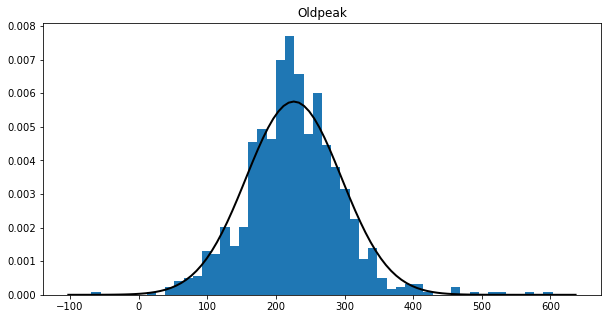

In [309]:
    plt.figure(figsize=(10,5))
    plt.hist(encoded_dataset_cleaned["Cholesterol"],bins=50,density=1)
    
    mu,std = norm.fit(encoded_dataset_cleaned["Cholesterol"])

    x_min,x_max = plt.xlim()
    y_min,y_max = plt.ylim()
    x = np.linspace(x_min,x_max,100)
    p = norm.pdf(x,mu,std)
    
    plt.plot(x,p,'k',linewidth=2)
    plt.title(clm)
    plt.show()

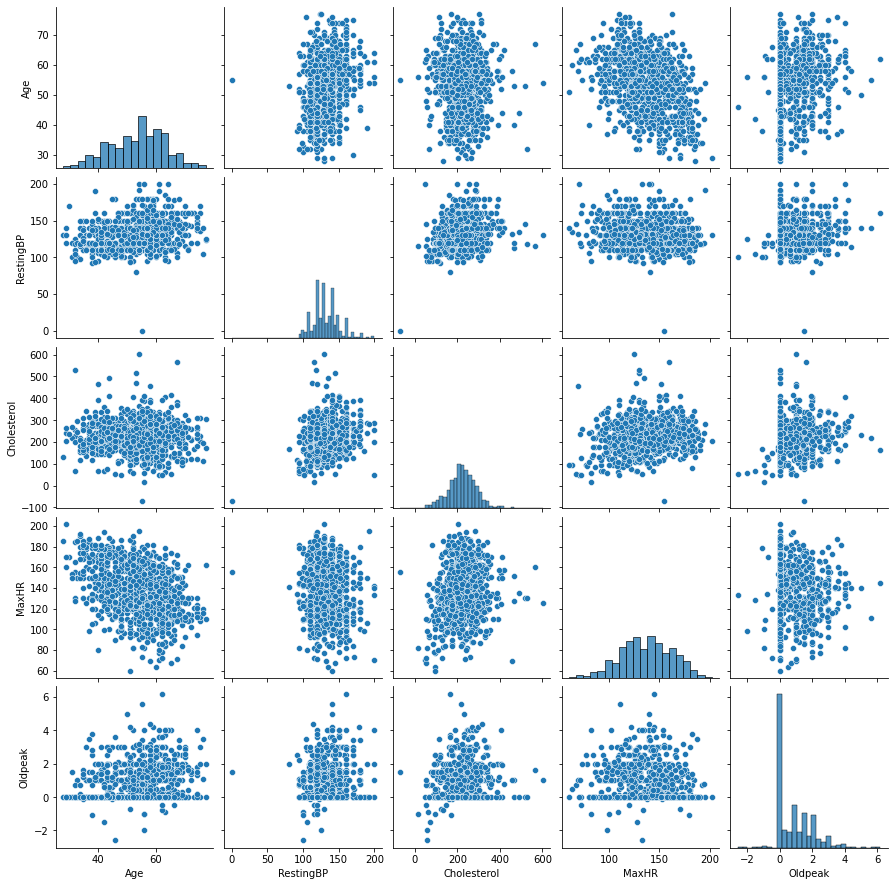

In [310]:
sns.pairplot(encoded_dataset[numeric_features])

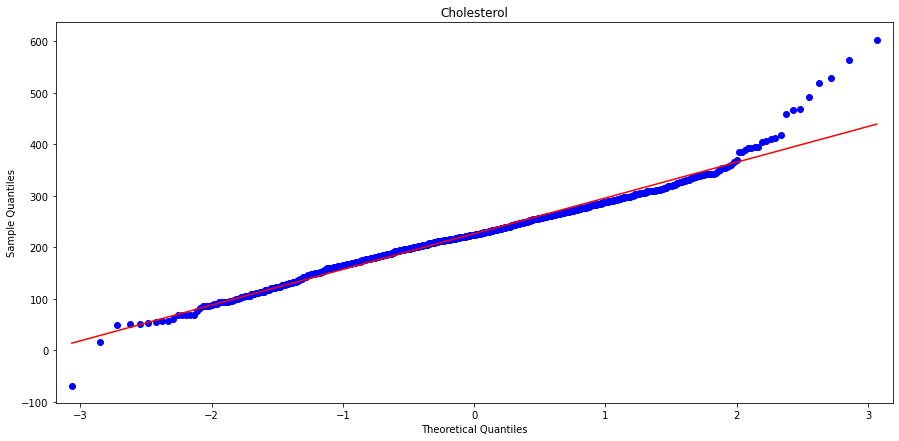

In [320]:
qqplot(encoded_dataset_cleaned["Cholesterol"],line='s')
plt.title("Cholesterol")
plt.show()

As we can see predicting the value of the colesterol just made our distribution more normal, and now our plot its a lot better visually
